In [25]:
import pandas as pd
import numpy as np   
import matplotlib.pyplot as plt
# import keras   
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense, Flatten, MaxPooling2D, Input
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [26]:
inputs = Input((1,))
x = Dense(32, activation='relu')(inputs)
x = Dense(64, activation='relu')(x)
x = Dense(128, activation='relu')(x)

outputs = Dense(1, activation='linear')(x)
model = Model(inputs, outputs)
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │            64 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,625 (41.50 KB)

 Trainable params: 10,625 (41.50 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
x = np.random.uniform(-20, 20, 1000).reshape(-1, 1)
y = (7*x**3)-(12*x**2) - (22*x) +7

In [28]:
x_normalization = 2*(x-np.min(x))/(np.max(x)-np.min(x))-1
y_normalization = 2*(y-np.min(y))/(np.max(y)-np.min(y))-1

# x_normalization

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x_normalization, y_normalization, test_size=0.05, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.05, random_state=42) 

In [30]:
print("X_train : ", x_train.shape)
print("X_test : ", x_test.shape)
print("y_train : ", y_train.shape)
print("y_test : ", y_test.shape)
print("X_val : ", x_val.shape)
print("y_val : ", y_val.shape)

X_train :  (902, 1)
X_test :  (50, 1)
y_train :  (902, 1)
y_test :  (50, 1)
X_val :  (48, 1)
y_val :  (48, 1)


In [31]:
from sklearn.metrics import r2_score,accuracy_score

In [32]:
model.compile(optimizer='adam', loss='mse', metrics=[tf.keras.metrics.R2Score(name='accuracy')])

In [33]:
history = model.fit(x_train, y_train, epochs=15, batch_size=32, validation_data=(x_val, y_val))

Epoch 1/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.4739 - loss: 0.0795 - val_accuracy: 0.8180 - val_loss: 0.0201
Epoch 2/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8550 - loss: 0.0212 - val_accuracy: 0.9168 - val_loss: 0.0092
Epoch 3/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9186 - loss: 0.0116 - val_accuracy: 0.9432 - val_loss: 0.0063
Epoch 4/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9522 - loss: 0.0069 - val_accuracy: 0.9485 - val_loss: 0.0057
Epoch 5/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9781 - loss: 0.0034 - val_accuracy: 0.9824 - val_loss: 0.0019
Epoch 6/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9888 - loss: 0.0017 - val_accuracy: 0.9929 - val_loss: 7.8279e-04
Epoch 7/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9922 - loss: 0.0011 - val_accuracy: 0.9948 - val_loss: 5.7448e-04
Epoch 8/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9952 - loss: 6.7476e-04 - val_accuracy: 0.9971

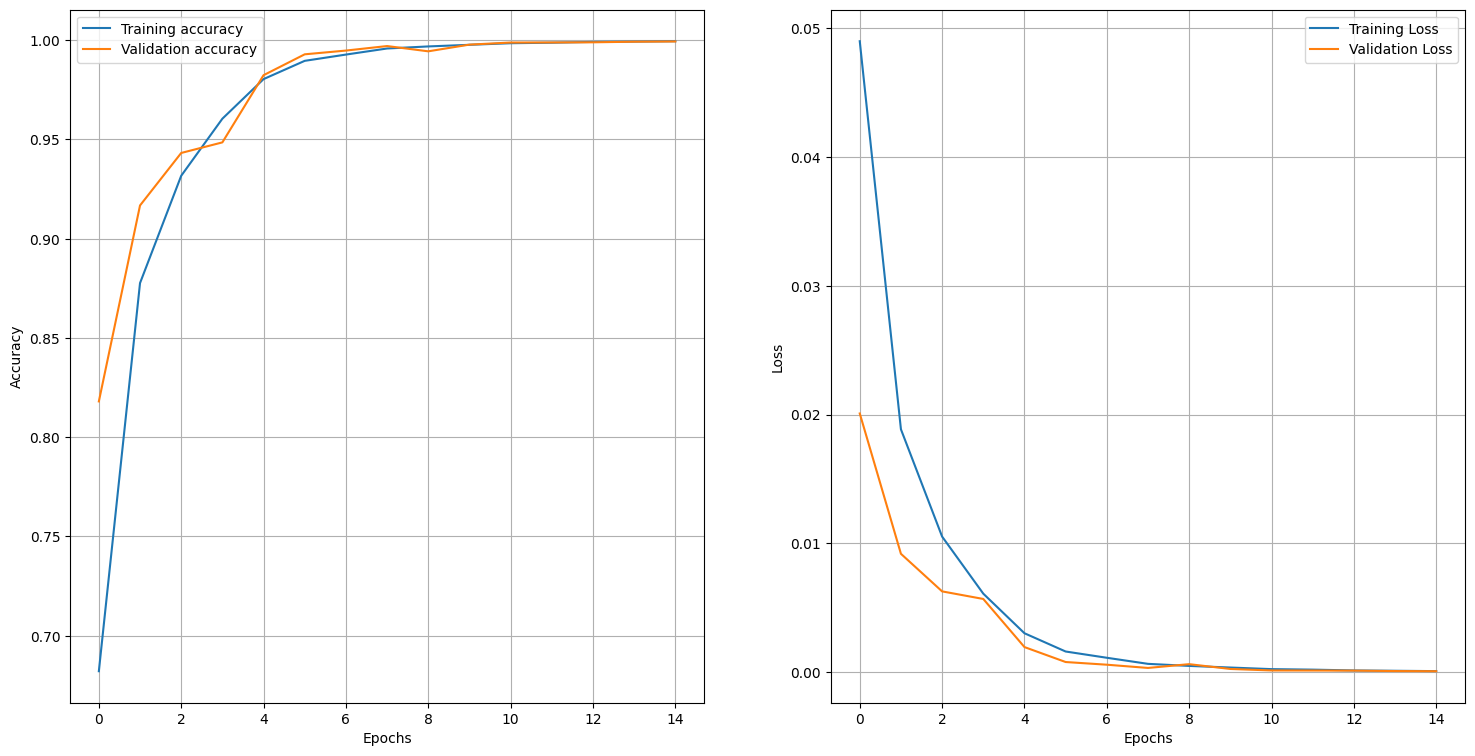

In [34]:
plt.figure(figsize=(18,9))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

In [35]:
y_pred = model.predict(x_test)
y_pred

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


array([[ 0.09210113],
       [ 0.623517  ],
       [ 0.18523332],
       [-0.78203064],
       [ 0.0521504 ],
       [ 0.09244097],
       [ 0.05808396],
       [-0.15427586],
       [ 0.09144482],
       [ 0.08921687],
       [-0.90216786],
       [ 0.02924003],
       [-0.20142277],
       [ 0.08958087],
       [ 0.7147189 ],
       [-0.360407  ],
       [ 0.13842757],
       [-0.66695434],
       [-0.78203064],
       [ 0.08927257],
       [ 0.31232485],
       [ 0.08937902],
       [ 0.0451373 ],
       [-0.3395002 ],
       [ 0.5337079 ],
       [ 0.08779607],
       [ 0.01156904],
       [ 0.09035601],
       [ 0.05787561],
       [ 0.09299505],
       [-0.36663455],
       [-0.21504904],
       [ 0.09243587],
       [-0.03483918],
       [ 0.08822092],
       [ 0.5004136 ],
       [ 0.08766665],
       [ 0.11054518],
       [ 0.08912276],
       [ 0.09605014],
       [ 0.08866786],
       [-0.43493193],
       [ 0.04371692],
       [ 0.15148598],
       [ 0.2126031 ],
       [ 0

In [36]:
x_true = ((x_test+1)*(np.max(x)-np.min(x))/2)+np.min(x)
y_true = ((y_test+1)*(np.max(y)-np.min(y))/2)+np.min(y)
print(x_true[:10])
print(y_true[:10])

In [37]:
y_pred_true = ((y_pred+1)*(np.max(y)-np.min(y))/2)+np.min(y)
print(y_pred_true[:10])

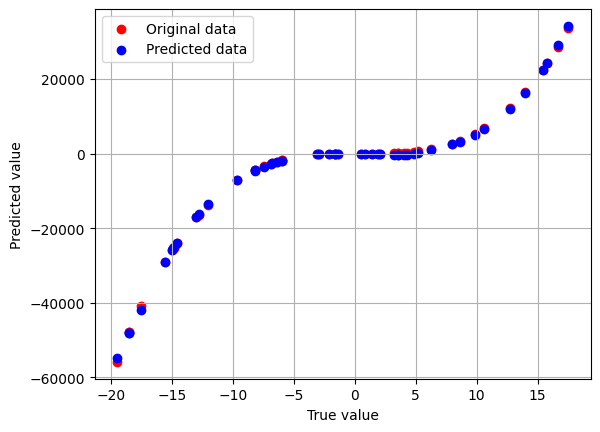

In [38]:
plt.scatter(x_true, y_true, color='red', label='Original data')
plt.scatter(x_true, y_pred_true, color='blue', label='Predicted data')
plt.xlabel('True value')
plt.ylabel('Predicted value')
plt.legend()
plt.grid()
plt.show()

In [39]:
# Checking if TensorFlow 2.10.0 includes R2Score as a valid metric by importing it directly

import tensorflow as tf

# Checking the TensorFlow version
tf.__version__

# # Trying to find R2Score metric within tensorflow keras metrics
# has_r2score = hasattr(tf.keras.metrics, 'R2Score')
# has_r2score


'2.17.0'

In [40]:
import tensorflow as tf
print(tf.__version__)


2.17.0
